## **Machine model to segment mall customers into different groups using k means clustering**
### **Steps:**
  1. Importing needed libraries
  2. Data preprocessing
  3. Elbow method
  4. Training kmeans model
  5. Visualizing train results

In [1]:
# 1. importing neede libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 2. data preprocessing
# 2.1. import needed dataset
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# 2.2. checking for missing values
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
# 2.3. Splitting independent variable
# since clustering is a unsupervised technique there is no dependent variable
# for simple learning purpose we took only two columns from the original dataset.
X = df.iloc[:, [3,4]].values

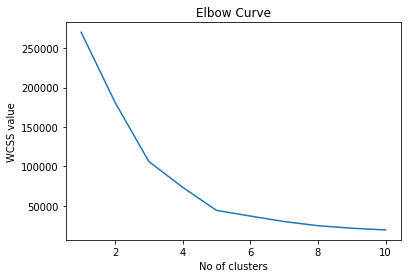

In [5]:
# 3. elbow curve to find optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++')
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow Curve')
plt.xlabel('No of clusters')
plt.ylabel('WCSS value')
plt.show()

In [6]:
# 4. training kmeans model
# from the elbow curve we can infer that 5 is the optimal number of clusters.
# fit_predict method return the cluster number assigned for each data

kmeans = KMeans(n_clusters=5, init='k-means++')
y_pred = kmeans.fit_predict(X)

In [7]:
y_pred

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3,
       1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

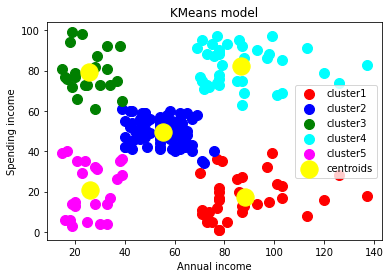

In [8]:
# 5. visualizing training results
plt.scatter(X[y_pred==0, 0], X[y_pred==0, 1], s=100, c='red', label='cluster1')
plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1], s=100, c='blue', label='cluster2')
plt.scatter(X[y_pred==2, 0], X[y_pred==2, 1], s=100, c='green', label='cluster3')
plt.scatter(X[y_pred==3, 0], X[y_pred==3, 1], s=100, c='cyan', label='cluster4')
plt.scatter(X[y_pred==4, 0], X[y_pred==4, 1], s=100, c='magenta', label='cluster5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='centroids')
plt.title('KMeans model')
plt.xlabel('Annual income')
plt.ylabel('Spending income')
plt.legend()
plt.show()